**ML - Fall 2023 - Practical - 3**<br>
**Practical Homework 3 - Logistic Regression**

### Full Name : Niki Sepasian
### Student Number : 400105003
### Colab Link:
___

# P1: Introduction (10 points)
The dataset consists of several game result predictor (independent) variables and one target (dependent) variable, `win_or_defeat`. <br> Independent variables include the `spell_used`, `position`, `towers_damage`, `kill_death_ratio`, `controlling_time`, and so on.
  * spell_used
  * trap_used
  * character
  * position
  * location
  * assists
  * damage_amount
  * towers_damage
  * rooms_damage
  * deaths
  * money_total
  * kill_death_ratio
  * kills_total
  * level
  * controlling_time
  * total_damage
  * earned_damage
  * special_enemy_killed
  * room_kills
  * main_score
  * win_or_defeat

First, we perform data exploration to get a better understanding of the data. Then, we perform data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
data_link = "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

In [2]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyte

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [4]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /kaggle/working/train.csv
100%|█████████████████████████████████████████| 493k/493k [00:00<00:00, 123MB/s]


Load the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. Report some other metrics like `Kurtosis` and `Interquartile range (IQR)` (hint: search and read about ydata-profiling). **(P1-1: 5 points)**

In [5]:
df= pd.read_csv('train.csv')

In [6]:
report= ProfileReport(df)

In [7]:
df= df.dropna()
df= df.drop_duplicates()

# kurtosis
num_df= df.select_dtypes(include='number')
print('Kurtosis information:\n', num_df.kurtosis())

# Access the IQR information from the report
print("\n\nIQR information:\n", num_df.quantile(0.75)-num_df.quantile(0.25), '\n')

df.head(10)

Kurtosis information:
 Unnamed: 0              -1.199976
spell_used              -0.771228
trap_used               -1.560519
assists                  1.796163
damage_amount           20.631801
towers_damage            3.060186
rooms_damage            20.631801
deaths                   0.372563
money_total              0.326406
kill_death_ratio         9.973199
kills_total              1.438422
level                   -0.384155
controlling_time        11.943538
total_damage             0.696798
earned_damage            1.792284
special_enemy_killed    -1.157044
room_kills               2.527769
main_score               3.950108
dtype: float64


IQR information:
 Unnamed: 0               2306.0
spell_used                  7.0
trap_used                   8.0
assists                     7.0
damage_amount            3349.0
towers_damage           11356.0
rooms_damage             3349.0
deaths                      5.0
money_total              4738.0
kill_death_ratio            3.2
kills_tota

,Unnamed: 0,spell_used,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,...,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,0,4,12,TwistedFate,Side.blue,Lane.top_lane,9.0,1862,5119,1862,...,1.222222,2,13,19,99079,25062,149,1,21,False
2,2,4,12,Ziggs,Side.blue,Lane.bot_lane,3.0,543,2754,543,...,1.750000,4,12,11,106757,10049,168,0,11,False
3,3,4,7,Senna,Side.red,Lane.bot_lane,4.0,1547,1547,1547,...,1.000000,2,12,14,53993,12480,129,1,11,False
5,5,4,11,Rengar,Side.red,Lane.jungle,7.0,1564,16053,1564,...,3.500000,7,14,14,128646,40236,27,1,17,True
6,6,4,12,Ziggs,Side.blue,Lane.bot_lane,9.0,19665,20431,19665,...,5.333333,7,12,11,123192,8057,140,4,9,True
7,7,4,14,Karma,Side.blue,Lane.utility,4.0,740,997,740,...,5.000000,1,10,17,18138,3414,25,0,38,False
8,8,3,4,Zyra,Side.red,Lane.utility,8.0,0,123,0,...,0.900000,1,12,49,32425,24632,30,0,91,False
9,9,4,12,Graves,Side.red,Lane.mid_lane,5.0,3277,3277,3277,...,1.800000,4,12,19,109150,13704,162,1,15,False
10,10,11,4,Olaf,Side.blue,Lane.jungle,3.0,0,7063,0,...,0.500000,2,13,12,106474,38614,19,0,29,False
11,11,14,12,Kled,Side.red,Lane.top_lane,3.0,3646,4463,3646,...,0.636364,4,14,7,119522,41289,178,0,13,False


Calculate the mean, standard deviation, min and max value for each non object column. **(P1-2: 5 points)**

In [8]:
nobj_df= df.select_dtypes(exclude=['object'])
data= []
for col in nobj_df.columns:
    data.append([col, nobj_df[col].mean(), nobj_df[col].min(), nobj_df[col].max(), nobj_df[col].std()])
vals= pd.DataFrame(data, columns=['Column', 'Mean', 'Min', 'Max', 'Std'])
vals

,Column,Mean,Min,Max,Std
0,Unnamed: 0,2308.996098,0,4615,1331.809470
1,spell_used,6.707782,1,21,3.976734
2,trap_used,8.430739,1,21,4.312468
3,assists,8.189031,0.0,41.0,5.639756
4,damage_amount,2639.487752,0,44162,3194.783198
5,towers_damage,9382.315847,0,68474,10101.251927
6,rooms_damage,2639.487752,0,44162,3194.783198
7,deaths,5.740733,0,21,3.020094
8,money_total,10865.129850,3093,28566,3473.747695
9,kill_death_ratio,3.602712,0.0,33.0,3.767723


# P2: Data Exploration (30 points)
In this section, we perform some data exploration to get a better understanding of the data.

1- Show number of unique value for `location` column **(P2-1: 5 points)**

In [9]:
df['location'].nunique() 

5

2- Plot correlation matrix between features **(P2-2: 5 points)**

<Axes: >

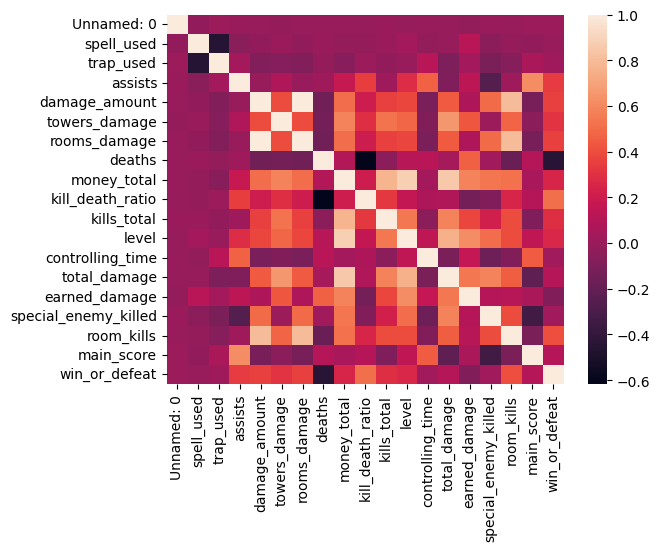

In [10]:
sns.heatmap(nobj_df.corr())

3- Plot bar plot of combined `position` and `location` columns (hint: use crosstab in pandas) **(P2-3: 5 points)**

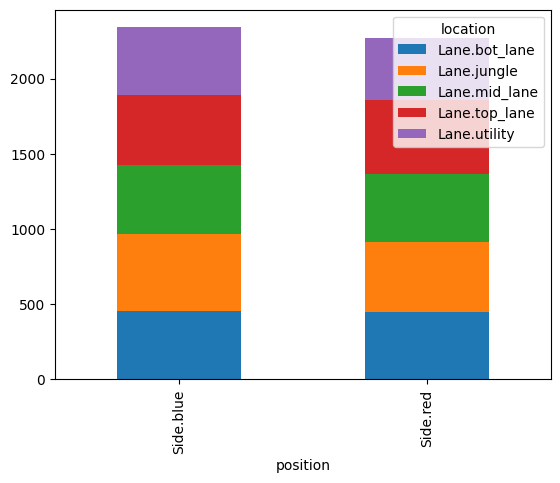

In [11]:
pd.crosstab(df['position'], df['location']).plot(kind='bar', stacked=True)
plt.show()

4- Plot pie chart of `level` column **(P2-4: 5 points)**

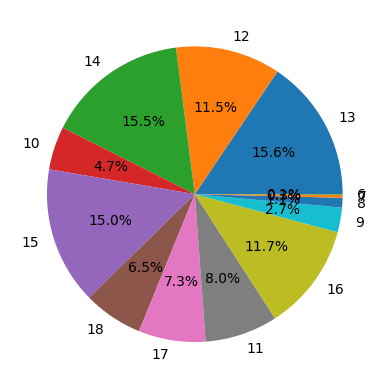

In [12]:
labels= df['level'].unique()
values=[];
for u in labels:
    count= df['level'].value_counts()[u]
    values.append(count)
    
plt.pie(values, labels= labels, autopct='%1.1f%%')
plt.show() 

5- Plot box-plot on combination of `location` and `earned_damage` columns **(P2-5: 5 points)**

<Axes: xlabel='location', ylabel='earned_damage'>

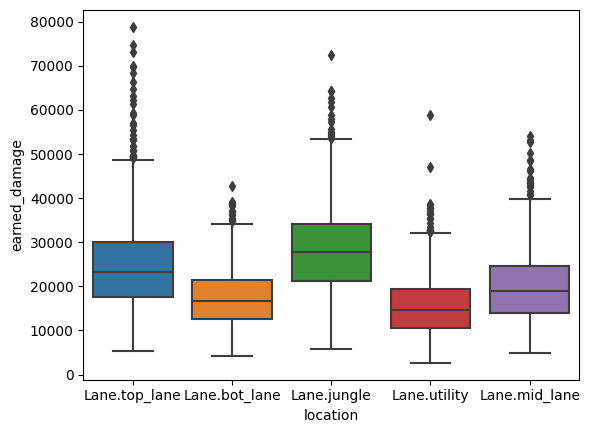

In [13]:
sns.boxplot(x='location', y='earned_damage', data=df)

6- Plot histplot of `spell_used` column (10 bins). **(P2-6: 5 points)**

<Axes: xlabel='spell_used', ylabel='Count'>

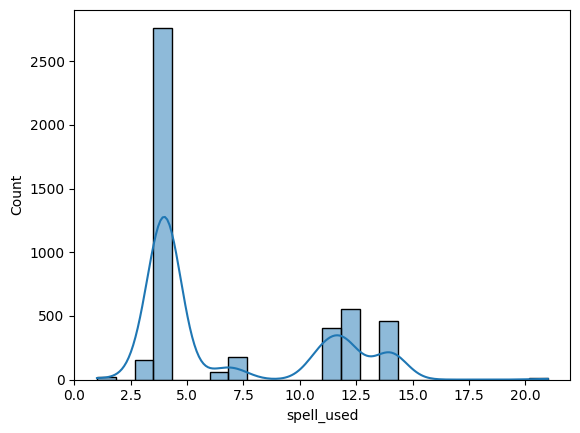

In [14]:
sns.histplot(df['spell_used'], kde=True)

# P3: Pre-processing (15 points)
In this section, we perform some pre-processing to make the data ready for model.

First of all, in your heatmap, there are some variables that have very low correlation with your dependent variable. You can delete those features that their absulote value of correlation with dependent variable is less than 0.015. **(P3-1: 5 points)**

<Axes: >

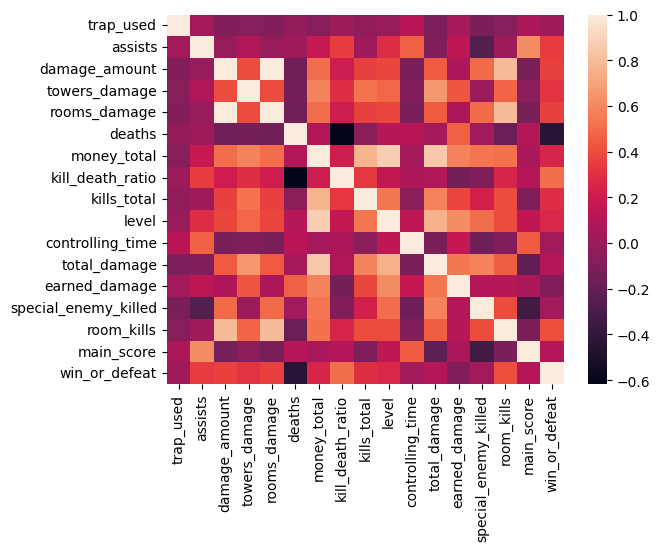

In [15]:
target= 'win_or_defeat'
corr= nobj_df.corr()
numeric= corr[abs(corr[target])>=0.015][target].index.to_list()
processed_df= df[numeric]

sns.heatmap(processed_df.corr())

Next step is to encode labels. Columns that are not numeric ('string' or 'object'), can't be given to the model, so you should convert them to numeric values <br> (hint: use sklearn LabelEncoder). **(P3-2: 5 points)**

In [16]:
categorical= df.select_dtypes(include='object').columns.to_list()
numeric.extend(categorical)
processed_df= df[numeric]

for col in categorical:
    processed_df[col]= LabelEncoder().fit_transform(processed_df[col])
processed_df

/tmp/ipykernel_19/952984221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col]= LabelEncoder().fit_transform(processed_df[col])
/tmp/ipykernel_19/952984221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col]= LabelEncoder().fit_transform(processed_df[col])
/tmp/ipykernel_19/952984221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat,character,position,location
0,12,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,False,129,0,3
2,12,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,False,153,0,0
3,7,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,False,105,1,0
5,11,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,True,99,1,1
6,12,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,True,153,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,1,10.0,4566,4566,4566,13,16116,1.384615,8,16,1,205910,30872,233,1,21,True,68,0,0
4612,14,15.0,157,10546,157,9,10825,1.888889,2,15,33,117028,31163,110,0,21,True,85,1,2
4613,6,8.0,5166,34572,5166,3,11959,6.333333,11,14,16,160912,24589,29,2,22,True,39,0,1
4614,4,3.0,11545,15434,11545,3,14657,2.666667,5,17,16,212560,19238,263,5,38,True,132,0,3


now we need to normalize columns of the dataframe which causes our model to converge better and prevent focusing on some specific number of columns. we use 'Z normalization' for this purpose.

be careful not to normalize 'win_or_defeat' column!

In [17]:
norm_indx= processed_df.columns[processed_df.columns!='win_or_defeat']
processed_df[norm_indx]= StandardScaler().fit_transform(processed_df[norm_indx])
processed_df

/tmp/ipykernel_19/552422723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[norm_indx]= StandardScaler().fit_transform(processed_df[norm_indx])


,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat,character,position,location
0,0.827751,0.143811,-0.243388,-0.422104,-0.243388,1.079311,-0.493218,-0.631880,-0.857765,-0.348308,0.005235,-0.263822,0.363075,0.336919,-0.024765,-0.438784,False,1.135156,-0.985152,0.731026
2,0.827751,-0.920181,-0.656293,-0.656259,-0.656293,-0.576446,-0.532949,-0.491786,-0.394431,-0.769585,-0.562991,-0.154760,-1.152349,0.563839,-0.786357,-0.917862,False,1.671426,-0.985152,-1.416887
3,-0.331804,-0.742849,-0.341997,-0.775762,-0.341997,0.085857,-0.780259,-0.690867,-0.857765,-0.769585,-0.349906,-0.904240,-0.906962,0.098057,-0.024765,-0.917862,False,0.598886,1.015071,-1.416887
5,0.595840,-0.210853,-0.336675,0.660454,-0.336675,-0.576446,0.193147,-0.027264,0.300569,0.072968,-0.349906,0.156159,1.894751,-1.120144,-0.024765,-0.630415,True,0.464819,1.015071,-0.700916
6,0.827751,0.143811,5.329738,1.093912,5.329738,-0.907597,-0.047830,0.459378,0.300569,-0.769585,-0.562991,0.078688,-1.353423,0.229431,2.260014,-1.013678,True,1.671426,-0.985152,-1.416887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,-1.723270,0.321143,0.603084,-0.476856,0.603084,2.403916,1.511750,-0.588774,0.532236,0.915520,-1.273274,1.253646,0.949541,1.340144,-0.024765,-0.438784,True,-0.227863,-0.985152,-1.416887
4612,1.291572,1.207802,-0.777128,0.115214,-0.777128,1.079311,-0.011554,-0.454919,-0.857765,0.494244,0.999631,-0.008867,0.978915,-0.128863,-0.786357,-0.438784,True,0.151995,1.015071,0.015055
4613,-0.563715,-0.033521,0.790910,2.493989,0.790910,-0.907597,0.314930,0.724819,1.227237,0.072968,-0.207850,0.614477,0.315330,-1.096258,0.736828,-0.390876,True,-0.875856,-0.985152,-0.700916
4614,-1.027537,-0.920181,2.787819,0.599167,2.787819,-0.907597,1.091697,-0.248465,-0.162764,1.336796,-0.207850,1.348105,-0.224804,1.698438,3.021607,0.375651,True,1.202190,-0.985152,0.731026


# P4: Regression Model (30 points)

Split the data to train, test, and validation using sklearn's `train_test_split`. Use 10% of the data for the testing phase, another 10% for the validation phase, and the remaining for the training phase.

In [18]:
x= processed_df.drop('win_or_defeat' ,axis= 1, inplace= False)
y= processed_df['win_or_defeat']

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

### Custom Regression Model

1- Complete custom logistic regression functions below **(P4-1: 10 points)**

In [19]:
from sklearn.metrics import accuracy_score

class CustomLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None

    def sigmoid(self, z):
        return (1/(1+np.exp(-z)))
    
    def loss(self, X, y):
        h= self.sigmoid(np.dot(X, self.weights)+self.bias)
        return ((np.dot(y.T, np.log(h))+ np.dot((1-y).T, np.log(1-h)))/(-X.shape[0]))

    def loss_backward(self, X, y):
        h= self.sigmoid(np.dot(X, self.weights) + self.bias)
        m= X.shape[0]
        
        dw= np.dot(X.T, (h-y))/m
        db= np.sum(h-y)/m
        
        return dw, db

    def fit(self, X, y):
        self.weights= np.zeros(X.shape[1])
        self.bias= 0
        
        for i in range(self.num_iterations):
            dw, db= self.loss_backward(X, y)
            self.weights-= self.learning_rate*dw
            self.bias-= self.learning_rate*db
    
    def predict(self, X):
        return (np.round(self.sigmoid(np.dot(X, self.weights)+self.bias)).astype(bool))

### Torch Regression Model

2- Implement the Logistic Regression Model. This time, use Pytorch! **(P4-2: 10 points)**

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchLogisticRegression():

    def __init__(self, input_size, learning_rate=0.01, num_iterations=1000):
        super(TorchLogisticRegression, self).__init__()
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.model = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.criterion = nn.BCELoss()
        self.optimizer = optim.SGD(self.parameters(), lr=learning_rate)

    def loss(self, X, y):
        return self.criterion(self.sigmoid(self.linear(X)), y)

    def predict(self, X):
        with torch.no_grad():
            pred= (self.sigmoid(self.linear(X)) >= 0.5).float()
        return pred

    def fit(self, X_train, y_train):
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

        for i in range(self.num_iterations):
            self.optimizer.zero_grad()
            loss= self.loss(X_train, Y_train)
            loss.backward()
            self.optimizer.step()

### SK-Learn Regression Model

3- Now train a Logistic Regression using SK-Learn **(P4-3: 5 points)**

In [21]:
from sklearn.linear_model import LogisticRegression

sklearn_model= LogisticRegression()
sklearn_model.fit(x_train, y_train)
sklearn_pred= sklearn_model.predict(x_test)

### Predicting the output for the testing data
4- Train Custom Logistic Regression and Torch Logistic Regression models and then Predict the `Outcome` for the testing samples using both models. **(P4-4: 5 points)**

In [22]:
scratch_model= CustomLogisticRegression()
scratch_model.fit(x_train, y_train)
scratch_pred= scratch_model.predict(x_test)

torch_model= LogisticRegression()
torch_model.fit(x_train, y_train)
torch_pred= torch_model.predict(x_test)

# P5: Evaluation (10 points)

1- Complete the metric codes. then evaluate all the models results using the implemented metrices and compare them. **(P5-1: 10 points)**

In [23]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def accuracy(self):
        correct_count= 0
        for real, pred in zip(self.y_true, self.y_pred):
            correct_count+= int(real==pred)
        return (correct_count/len(self.y_true))

    def f1_score(self):
        precision= self.precision()
        accuracy= self.accuracy()
        return ((2*accuracy*precision)/(accuracy+precision))

    def precision(self):
        true_positive=0
        false_positive=0
        for real, pred in zip(self.y_true, self.y_pred):
            if(pred==True):
                true_positive+= int(real==True)
                false_positive+= int(real!=True)
        return (true_positive/(true_positive+false_positive))

    def recall(self):
        true_positive=0
        false_negative=0
        for real, pred in zip(self.y_true, self.y_pred):
            if(pred==True):
                true_positive+= int(real==True)
            else:  
                false_negative+= int(real==True)
        return (true_positive/(true_positive+false_negative))

    def confusion_matrix(self):
        true_positive=0
        true_negative=0
        false_positive=0
        false_negative=0
        for real, pred in zip(self.y_true, self.y_pred):
            if(pred==True):
                true_positive+= int(real==True)
                false_positive+= int(real!=True)
            else:
                true_negative+= int(real==False)
                false_negative+= int(real!=False)
                
        return [[true_negative, false_positive], [false_negative, true_positive]]

In [24]:
sklearn_report = classification_full_report(y_test, sklearn_pred)

print("sklearn model report:\n")
print("Accuracy:", sklearn_report.accuracy())
print("F1 Score:", sklearn_report.f1_score())
print("Precision:", sklearn_report.precision())
print("Recall:", sklearn_report.recall())
print("Confusion Matrix:", sklearn_report.confusion_matrix())

sklearn model report:

Accuracy: 0.829004329004329
F1 Score: 0.8381665865788208
Precision: 0.8475336322869955
Recall: 0.8076923076923077
Confusion Matrix: [[194, 34], [45, 189]]


In [25]:
scratch_report = classification_full_report(y_test, scratch_pred)

print("custom model report:\n")
print("Accuracy:", scratch_report.accuracy())
print("F1 Score:", scratch_report.f1_score())
print("Precision:", scratch_report.precision())
print("Recall:", scratch_report.recall())
print("Confusion Matrix:", scratch_report.confusion_matrix())

custom model report:

Accuracy: 0.8181818181818182
F1 Score: 0.829389788293898
Precision: 0.8409090909090909
Recall: 0.7905982905982906
Confusion Matrix: [[193, 35], [49, 185]]


In [26]:
torch_report = classification_full_report(y_test, torch_pred)

print("torch model report:\n")
print("Accuracy:", torch_report.accuracy())
print("F1 Score:", torch_report.f1_score())
print("Precision:", torch_report.precision())
print("Recall:", torch_report.recall())
print("Confusion Matrix:", torch_report.confusion_matrix())

torch model report:

Accuracy: 0.829004329004329
F1 Score: 0.8381665865788208
Precision: 0.8475336322869955
Recall: 0.8076923076923077
Confusion Matrix: [[194, 34], [45, 189]]


# P6: Neural Net (5 points)

Implement a neural net containing the following layers: LSTM, CNN, Pooling and Dense (Linear). Train the neural network on the training data and tune its hyperparameters using the validation data. Finally, print a classification report indicating how well its doing on the testing data. **(P6-1: 5 points)**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
116/116 [==============================] - 4s 13ms/step - loss: 0.2213 - accuracy: 0.6480 - val_loss: 0.2077 - val_accuracy: 0.6681
Epoch 2/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1874 - accuracy: 0.7203 - val_loss: 0.1905 - val_accuracy: 0.7202
Epoch 3/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1759 - accuracy: 0.7388 - val_loss: 0.1756 - val_accuracy: 0.7202
Epoch 4/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1611 - accuracy: 0.7648 - val_loss: 0.1572 - val_accuracy: 0.7614
Epoch 5/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1546 - accuracy: 0.7859 - val_loss: 0.1521 - val_accuracy: 0.7701
Epoch 6/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1422 - accuracy: 0.8041 - val_loss: 0.1441 - val_accuracy: 0.7787
Epoch 7/20
116/116 [==============================] - 1s 9ms/step - loss: 0.1401 - accuracy: 0.8038 - val_loss: 0.1626 - val_accuracy: 0.7592
Epoch

In [28]:
nn_pred= np.round(model.predict(x_test)).astype(bool)
nn_report= classification_full_report(y_test, nn_pred)

print("nn model report:\n")
print("Accuracy:", nn_report.accuracy())
print("F1 Score:", nn_report.f1_score())
print("Precision:", nn_report.precision())
print("Recall:", nn_report.recall())
print("Confusion Matrix:", nn_report.confusion_matrix())

15/15 [==============================] - 0s 3ms/step
nn model report:

Accuracy: 0.8311688311688312
F1 Score: 0.8253804488006191
Precision: 0.819672131147541
Recall: 0.8547008547008547
Confusion Matrix: [[184, 44], [34, 200]]
